In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:/Users/shiva/OneDrive/Desktop/Zomato_Performance_Analysis/zomato.csv')

In [3]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df['rate'].fillna('Not Rated',inplace=True)
df['rate'] = df['rate'].str.replace('NEW','Not Rated')

In [7]:
df['phone'].fillna('Not Provided',inplace=True)

In [8]:
df['rest_type'].fillna('Quick Bites',inplace=True)

In [9]:
df['location'].fillna('Not Provided', inplace=True)

In [10]:
df.drop(columns=['url','address','dish_liked','cuisines','menu_item','phone','reviews_list'],inplace=True)

In [11]:
df = df.drop_duplicates()

In [12]:
df

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,Not Rated,0,Whitefield,Bar,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,Not Rated,0,Whitefield,Bar,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"2,500",Pubs and bars,Whitefield


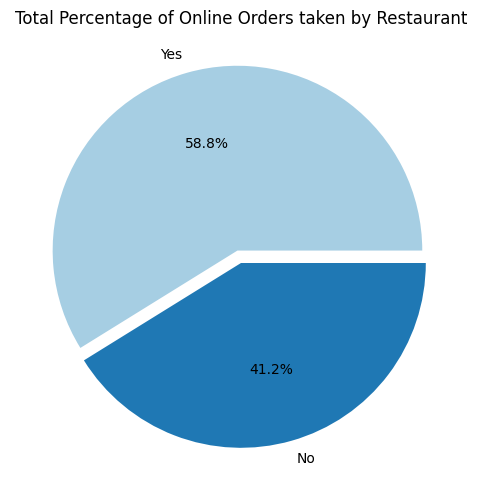

In [13]:
plt.figure(figsize=(10,6))
# sns.countplot(data=df,x=df.online_order,order=df.online_order.value_counts().index,palette='deep')
labels = df['online_order'].unique()
plt.pie(df['online_order'].value_counts().values,labels=labels,autopct='%.1f%%',explode=(0.07,0),colors=plt.cm.Paired.colors)
plt.title('Total Percentage of Online Orders taken by Restaurant')
plt.show()

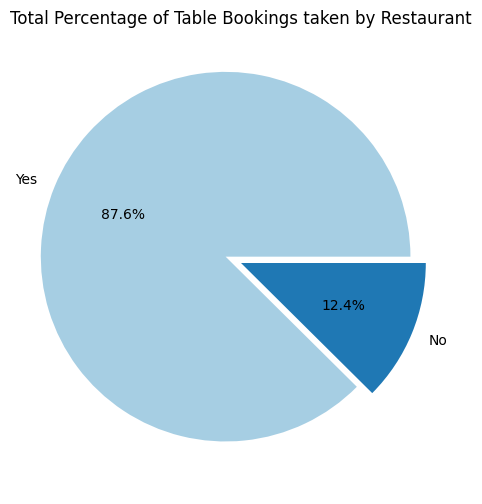

In [14]:
plt.figure(figsize=(10,6))
# sns.countplot(data=df,x=df.book_table,order=df.book_table.value_counts().index, palette='bright')
plt.pie(df['book_table'].value_counts().values,explode=(0.09,0),labels=['Yes','No'],autopct='%.1f%%',colors=plt.cm.Paired.colors)
plt.title('Total Percentage of Table Bookings taken by Restaurant')
plt.show()

In [15]:
df['rate'] = df['rate'].str.replace('/5','',regex=False)
df['rate'] = df['rate'].str.replace('Not Rated','',regex=False).str.replace('-', '', regex=False)
df['rate'] = df['rate'].replace({'':0})
df['rate'] = df['rate'].astype(float)

In [16]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    0.0
51714    0.0
51715    4.3
51716    3.4
Name: rate, Length: 51607, dtype: float64

In [17]:
df['rate'].fillna(0,inplace=True)

In [18]:
df['book_table'] = df['book_table'].replace({'Yes':1,'No':0})

booked_table = df.groupby('name')['book_table']
number=booked_table.sum()
booked_table = df[df['book_table'] == 1]['rate'].value_counts().sort_index()

In [19]:
rating = df.groupby(['name'])['rate'].mean()
rating.shape

(8792,)

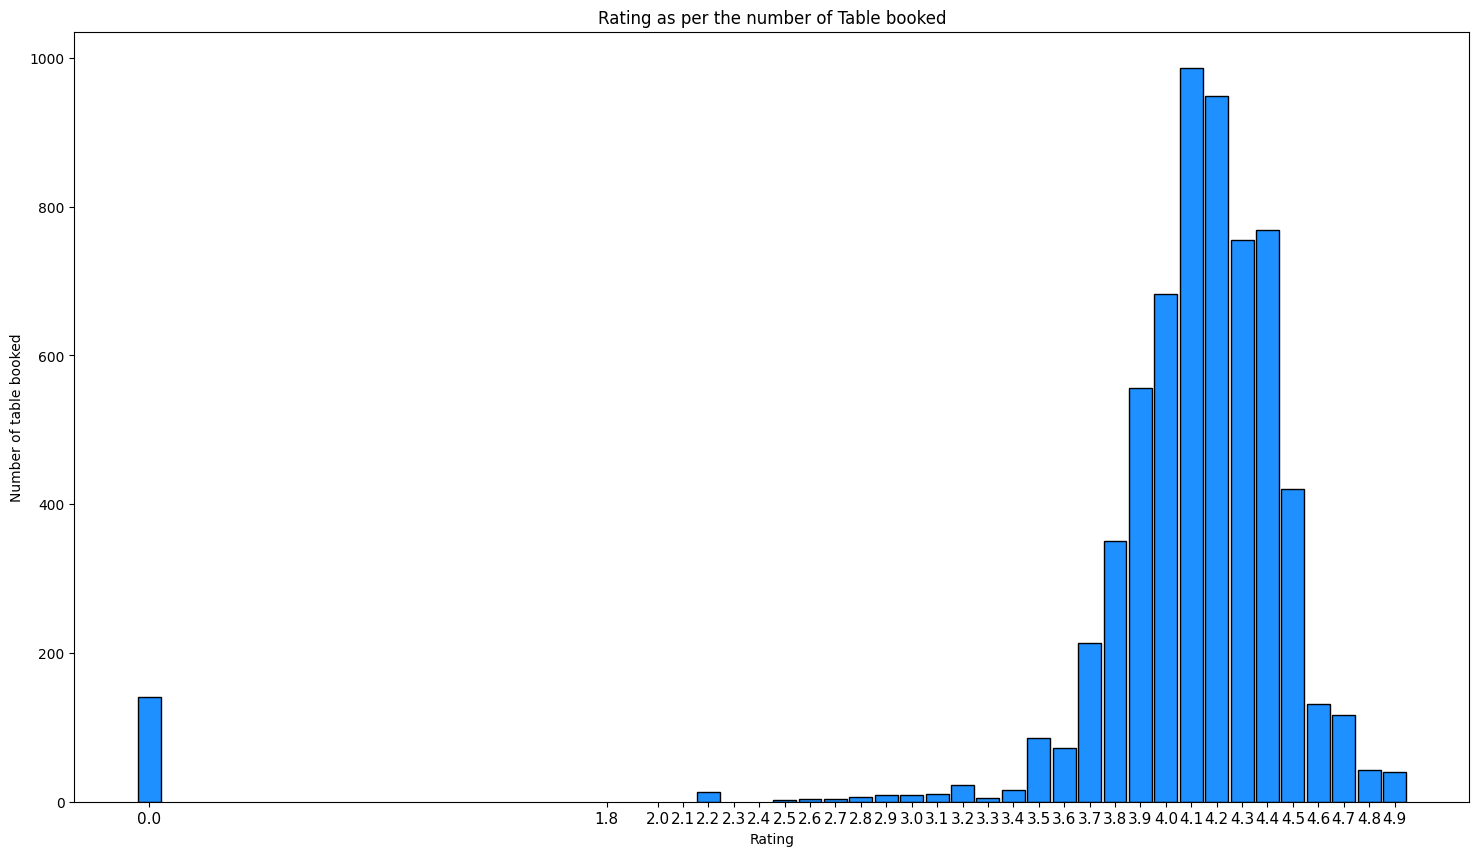

In [20]:
plt.figure(figsize=(18,10))

booked_table = df[df['book_table'] == 1]['rate'].value_counts()
plt.bar(booked_table.index,booked_table,color='dodgerblue',edgecolor='k',width=0.09)
plt.title('Rating as per the number of Table booked')
plt.xticks(df['rate'].unique(),fontsize=11)
plt.xlabel('Rating')
plt.ylabel('Number of table booked')
plt.show()

In [21]:
top_10_locations = df.groupby('location')['votes'].sum().sort_values(ascending=False).reset_index()[:10]
top_10_locations

,location,votes
0,Koramangala 5th Block,2218762
1,Indiranagar,1188487
2,Koramangala 4th Block,685156
3,BTM,618986
4,Church Street,590306
5,JP Nagar,586593
6,HSR,499270
7,Lavelle Road,496503
8,Koramangala 7th Block,488260
9,Jayanagar,488080


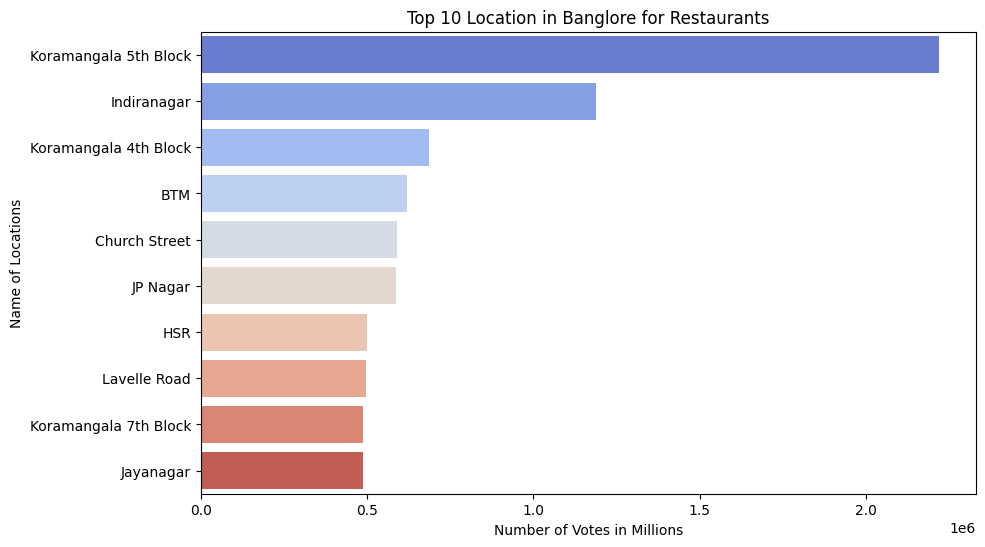

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_locations,y=top_10_locations['location'],x=top_10_locations['votes'],palette='coolwarm')
plt.title('Top 10 Location in Banglore for Restaurants')
plt.xlabel('Number of Votes in Millions')
plt.ylabel('Name of Locations')
plt.show()

In [23]:
top_10_locations_rate = df.groupby('location')['rate'].median().sort_values(ascending=False).reset_index()[:10]
top_10_locations_rate

,location,rate
0,Lavelle Road,4.3
1,St. Marks Road,4.1
2,Church Street,4.1
3,Koramangala 3rd Block,4.0
4,Sankey Road,4.0
5,Koramangala 5th Block,4.0
6,Cunningham Road,4.0
7,Sadashiv Nagar,3.9
8,Langford Town,3.9
9,MG Road,3.9


In [25]:
top_10_rest_type = df['rest_type'].value_counts(normalize=True).sort_values(ascending=False)[:10]
top_10_rest_type = top_10_rest_type*100
restaurant = df['rest_type']
restaurant = restaurant.apply(lambda x: x if x in top_10_rest_type else 'others')

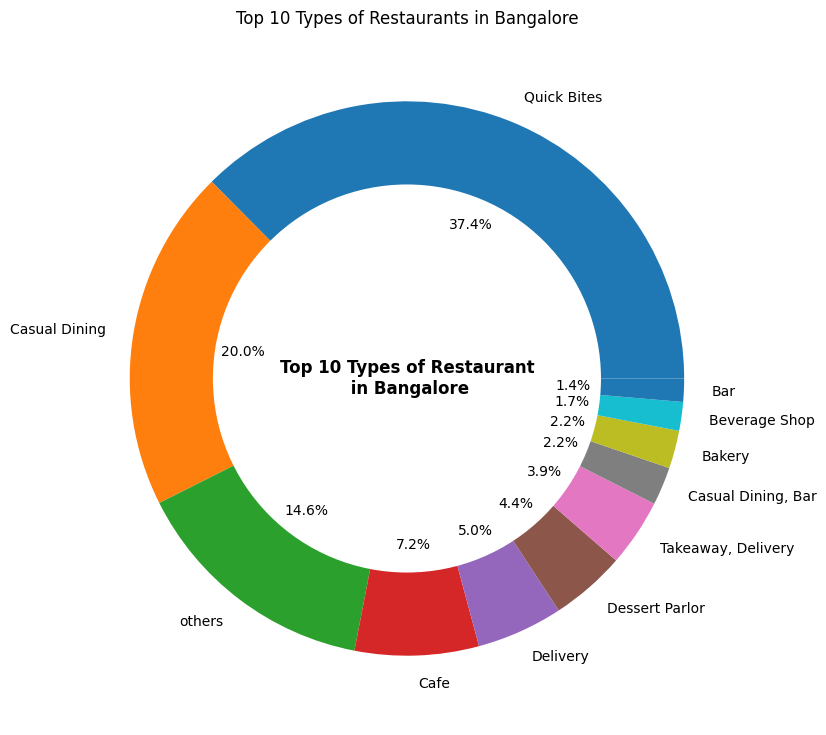

In [26]:
plt.figure(figsize=(18,9))
plt.pie(restaurant.value_counts().values,labels=restaurant.value_counts().index,autopct='%.1f%%')
Centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(Centre_circle)
plt.text(0,0,f'Top 10 Types of Restaurant\n in Bangalore',fontsize=12,ha='center',va='center',fontweight='semibold')
plt.title('Top 10 Types of Restaurants in Bangalore')
plt.show()

In [27]:
top_10_rest_type_rate = df.groupby('rest_type')['rate'].mean()
top_10_rest_type_rate = top_10_rest_type_rate.sort_values(ascending=False)[:10]
top_10_rest_type_rate =top_10_rest_type_rate.reset_index()
top_10_rest_type_rate

,rest_type,rate
0,"Pub, Cafe",4.657500
1,"Bar, Pub",4.600000
2,"Microbrewery, Bar",4.446154
3,"Microbrewery, Pub",4.438095
4,"Casual Dining, Irani Cafee",4.406667
5,"Fine Dining, Lounge",4.400000
6,"Cafe, Lounge",4.400000
7,"Casual Dining, Microbrewery",4.308475
8,"Fine Dining, Microbrewery",4.300000
9,"Microbrewery, Lounge",4.255556


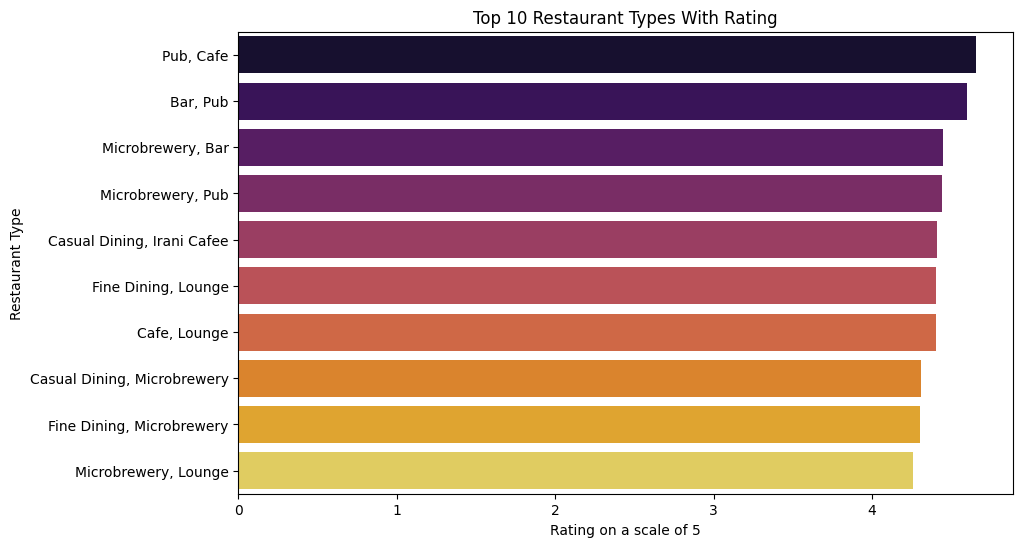

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_rest_type_rate,y=top_10_rest_type_rate['rest_type'], x=top_10_rest_type_rate['rate'],palette='inferno')
plt.title('Top 10 Restaurant Types With Rating')
plt.xlabel('Rating on a scale of 5')
plt.ylabel('Restaurant Type')
plt.show()

In [29]:

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace({',':''})
df['approx_cost(for two people)'].fillna(0,inplace=True)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [30]:
lowest_10_restaurant = df.groupby(['name','rate'])[['approx_cost(for two people)']].mean().reset_index()
lowest_10_restaurant = lowest_10_restaurant.sort_values('approx_cost(for two people)',ascending=False)
lowest_10_restaurant = lowest_10_restaurant[((lowest_10_restaurant['rate']<3) & (lowest_10_restaurant['rate']>1)) & (lowest_10_restaurant['approx_cost(for two people)']>=500)]
lowest_10_restaurant

,name,rate,approx_cost(for two people)
3753,Flame Pub & Restaurant - Brigade Garden,2.9,1900.0
4042,Fusion Lounge,2.0,1500.0
11706,Turquoise,2.8,1200.0
413,Alibi - Maya International Hotel,1.8,1200.0
5813,Keys Cafe - Keys Hotel,2.8,1200.0
...,...,...,...
11737,US Pizza,2.4,500.0
6231,Late Night,2.8,500.0
6847,Meat And Eat,2.8,500.0
3599,Express Food Delivery,2.8,500.0


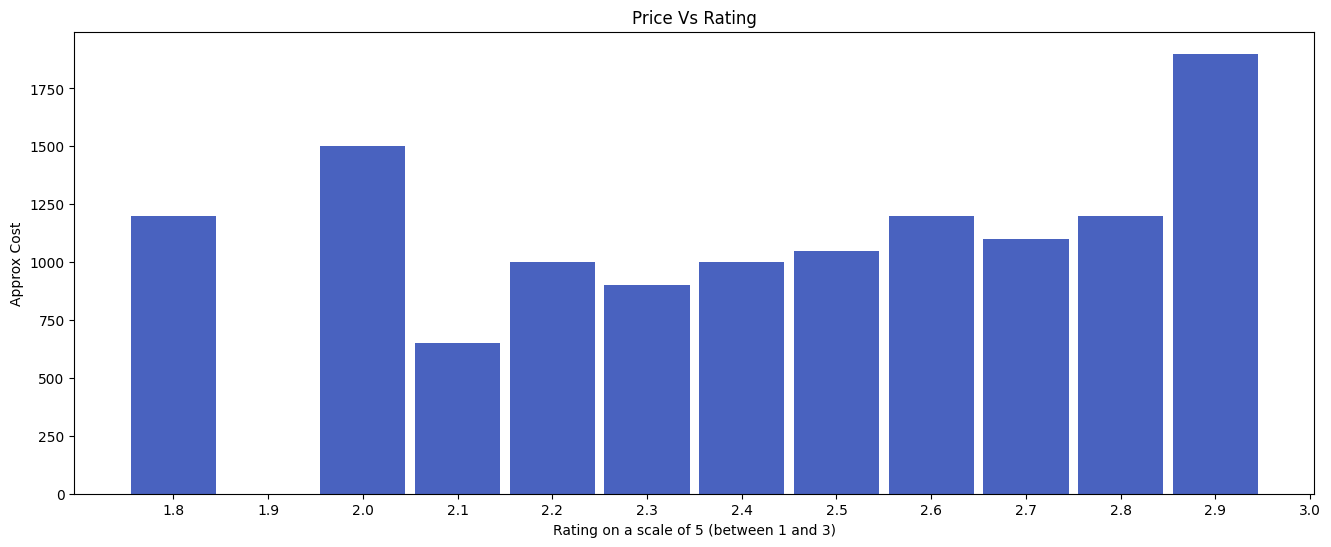

In [31]:
plt.figure(figsize=(16,6))
plt.bar(lowest_10_restaurant['rate'],lowest_10_restaurant['approx_cost(for two people)'],width=0.09,color='#4962bf')
plt.title('Price Vs Rating')
plt.xlabel('Rating on a scale of 5 (between 1 and 3)')
plt.xticks([1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0])
plt.ylabel('Approx Cost')
plt.show()

In [32]:
top_10_services = df.groupby('listed_in(type)')['name'].count().reset_index()
top_10_services = top_10_services.sort_values('name',ascending=False)
top_10_services

,listed_in(type),name
2,Delivery,25866
4,Dine-out,17757
3,Desserts,3593
1,Cafes,1723
5,Drinks & nightlife,1094
0,Buffet,880
6,Pubs and bars,694


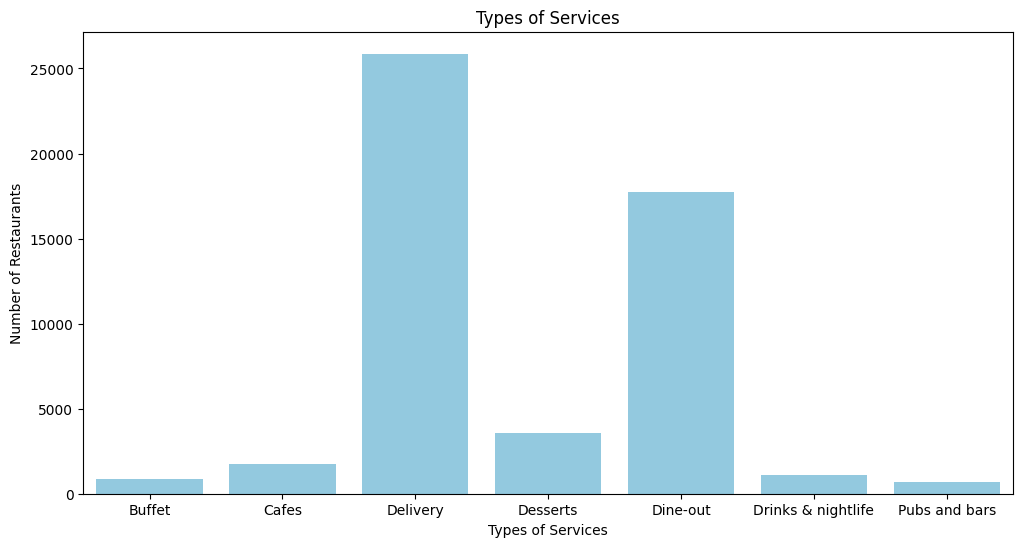

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='listed_in(type)',order=df['listed_in(type)'],color='skyblue')
plt.title('Types of Services')
plt.ylabel('Number of Restaurants')
plt.xlabel('Types of Services')
plt.show()

In [34]:
top_10_exp_rest = df.groupby(['name'])[['approx_cost(for two people)','rate']].median().sort_values('approx_cost(for two people)',ascending=False).reset_index()[:10]
top_10_exp_rest 

,name,approx_cost(for two people),rate
0,Le Cirque Signature - The Leela Palace,6000.0,4.3
1,Royal Afghan - ITC Windsor,5000.0,4.3
2,Malties - Radisson Blu,4500.0,4.3
3,La Brasserie - Le Meridien,4100.0,4.1
4,Grill 99 - The Ritz-Carlton,4000.0,3.4
5,Edo Restaurant & Bar - ITC Gardenia,4000.0,4.3
6,Masala Klub - The Taj West End,4000.0,4.4
7,Alba - JW Marriott Bengaluru,4000.0,4.4
8,Jamavar - The Leela Palace,4000.0,4.2
9,Riwaz - The Ritz-Carlton,4000.0,4.1


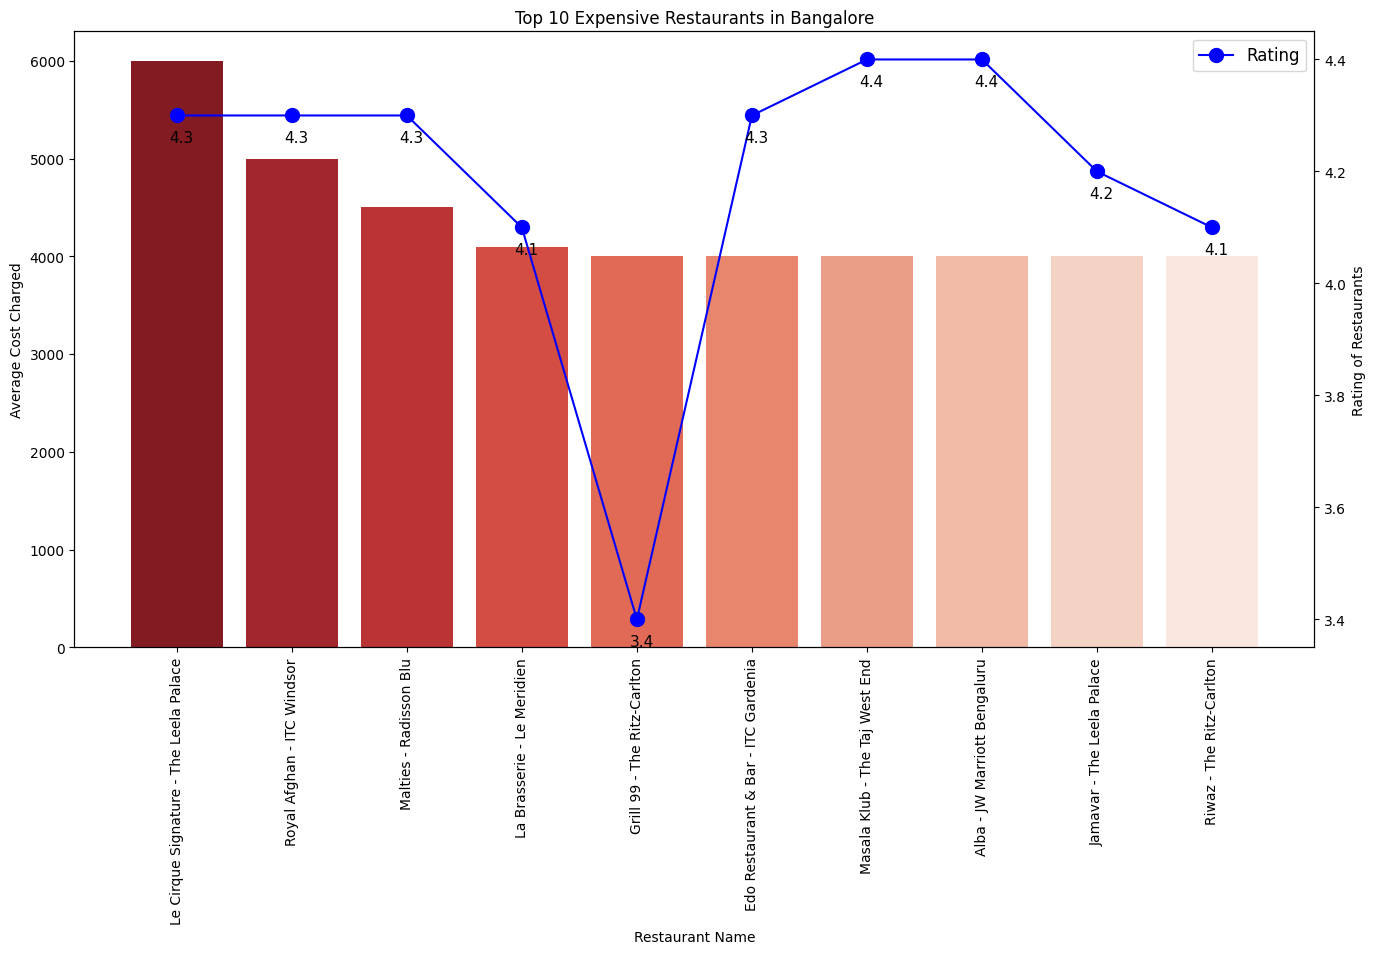

In [35]:
plt.figure(figsize=(16,8))
ax1 = sns.barplot(data=top_10_exp_rest,x=top_10_exp_rest['name'],y=top_10_exp_rest['approx_cost(for two people)'],palette='Reds_r')
ax2 = ax1.twinx()
ax2.plot(top_10_exp_rest['name'],top_10_exp_rest['rate'],marker='o',markersize=10,color='blue',label='Rating')
for i,value in enumerate(top_10_exp_rest['rate']):
    ax2.text(i+0.04,value-0.04,str(value),ha='center',va='center',color='black',fontsize=11)
ax1.set_xticklabels(top_10_exp_rest['name'],rotation=90)
ax1.set_title('Top 10 Expensive Restaurants in Bangalore')
ax1.set_xlabel('Restaurant Name')
ax1.set_ylabel('Average Cost Charged')
ax2.set_ylabel('Rating of Restaurants')
plt.legend(fontsize=12)
plt.show()

In [36]:
top_10_rest_loc = df.groupby('listed_in(city)')['name'].count().sort_values(ascending=False).reset_index()[:10]
top_10_rest_loc

,listed_in(city),name
0,BTM,3266
1,Koramangala 7th Block,2935
2,Koramangala 5th Block,2832
3,Koramangala 4th Block,2777
4,Koramangala 6th Block,2622
5,Jayanagar,2365
6,JP Nagar,2095
7,Indiranagar,1856
8,MG Road,1806
9,Church Street,1793


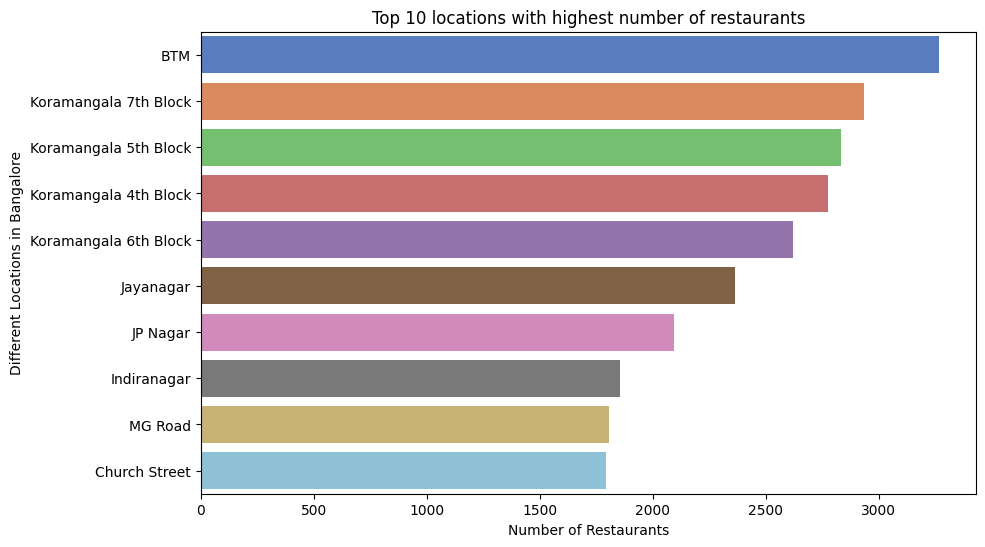

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_rest_loc,y='listed_in(city)',x='name',palette='muted')
plt.title('Top 10 locations with highest number of restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Different Locations in Bangalore')
plt.show()

In [38]:
top_10_famous_rest = df.groupby(['name'])['votes'].sum().sort_values(ascending=False).reset_index()[:10]
median_rate = df.groupby('name').rate.median()
top_10_famous_rest['rate'] = top_10_famous_rest['name'].map(median_rate)
top_10_famous_rest

,name,votes,rate
0,Onesta,347520,4.4
1,Truffles,301059,4.6
2,Empire Restaurant,229808,4.0
3,Hammered,180602,4.7
4,The Black Pearl,172122,4.7
5,Meghana Foods,129557,4.4
6,Barbeque Nation,108425,4.5
7,Smally's Resto Cafe,102877,4.2
8,Byg Brewski Brewing Company,99531,4.9
9,Gilly's Restobar,98808,4.5


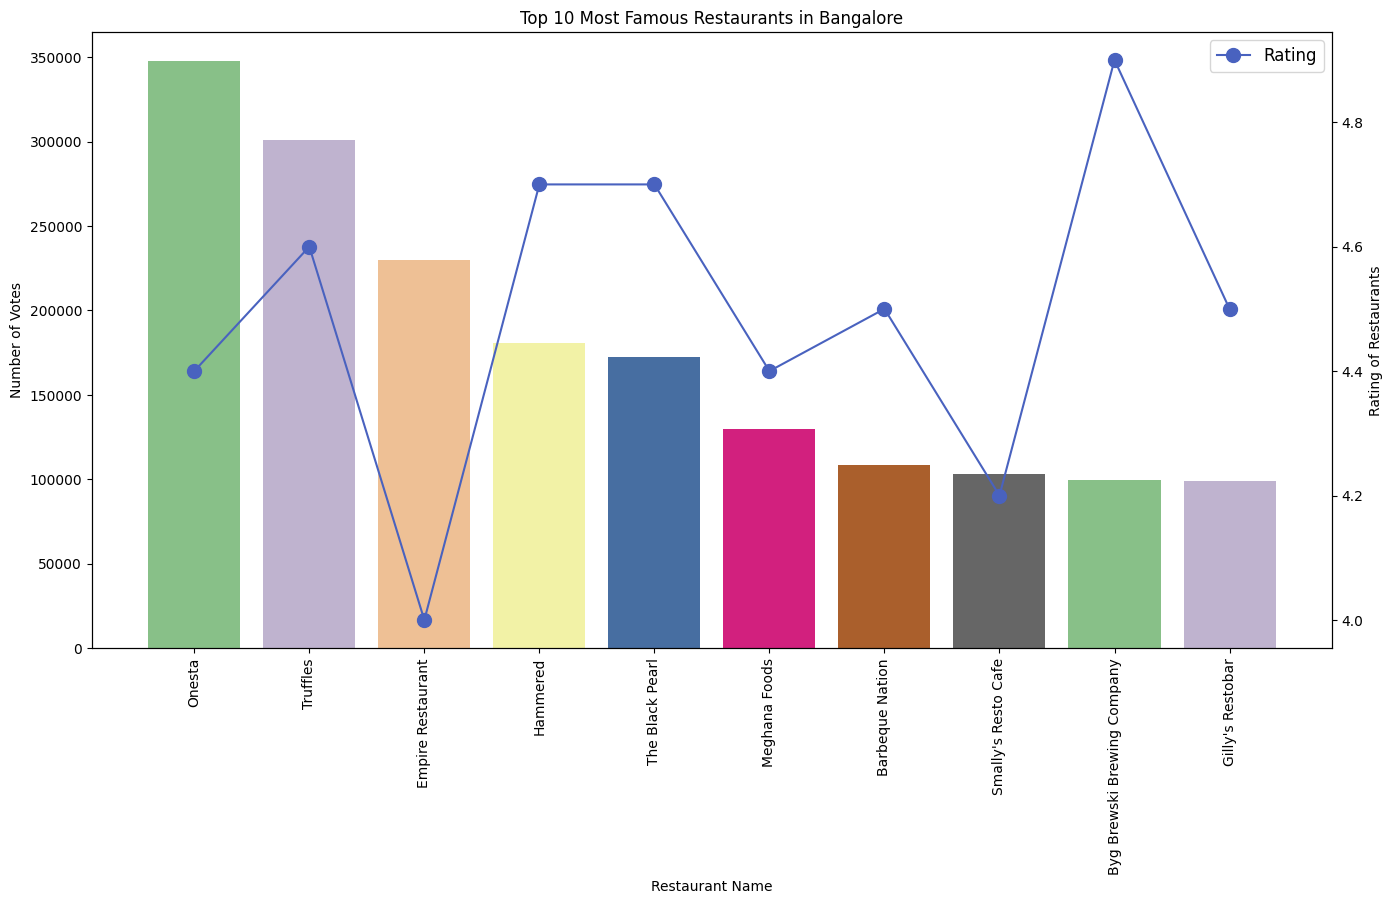

In [39]:
plt.figure(figsize=(16,8))
ax1 = sns.barplot(data=top_10_famous_rest,x=top_10_famous_rest['name'],y=top_10_famous_rest['votes'],palette='Accent')
ax2 = ax1.twinx()
ax2.plot(top_10_famous_rest['name'],top_10_famous_rest['rate'],marker='o',markersize=10,color='#4962bf',label='Rating')
ax1.set_xticklabels(top_10_famous_rest['name'],rotation=90)
ax1.set_title('Top 10 Most Famous Restaurants in Bangalore')
ax1.set_xlabel('Restaurant Name')
ax1.set_ylabel('Number of Votes')
ax2.set_ylabel('Rating of Restaurants')
plt.legend(fontsize=12)
plt.show()

In [41]:
df.to_csv('zomato_eda')